# 7.5 AdaGrad算法

In [1]:
%matplotlib inline
import math
import torch
import sys
sys.path.append("..") 
import d2lzh_pytorch as d2l

## 7.5.2 特点

epoch 20, x1 -2.382563, x2 -0.158591


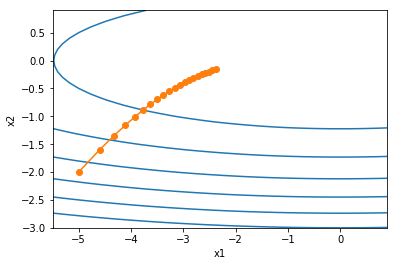

In [2]:
def adagrad_2d(x1, x2, s1, s2):
    g1, g2, eps = 0.2 * x1, 4 * x2, 1e-6  # 前两项为自变量梯度
    s1 += g1 ** 2
    s2 += g2 ** 2
    x1 -= eta / math.sqrt(s1 + eps) * g1
    x2 -= eta / math.sqrt(s2 + eps) * g2
    return x1, x2, s1, s2

def f_2d(x1, x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2

eta = 0.4
d2l.show_trace_2d(f_2d, d2l.train_2d(adagrad_2d))

epoch 20, x1 -0.002295, x2 -0.000000


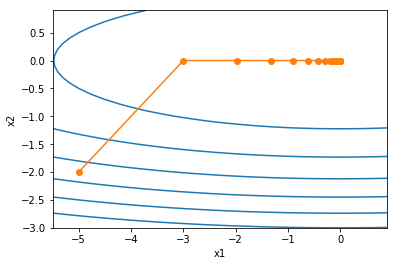

In [3]:
eta = 2
d2l.show_trace_2d(f_2d, d2l.train_2d(adagrad_2d))

## 7.5.3 从零开始实现

In [4]:
features, labels = d2l.get_data_ch7()

def init_adagrad_states():
    s_w = torch.zeros((features.shape[1], 1), dtype=torch.float32)
    s_b = torch.zeros(1, dtype=torch.float32)
    return (s_w, s_b)

def adagrad(params, states, hyperparams):
    eps = 1e-6
    for p, s in zip(params, states):
        s.data += (p.grad.data**2)
        p.data -= hyperparams['lr'] * p.grad.data / torch.sqrt(s + eps)

loss: 0.242541, 0.047213 sec per epoch


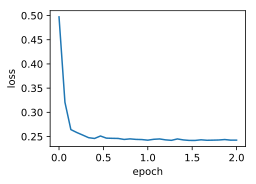

In [5]:
d2l.train_ch7(adagrad, init_adagrad_states(), {'lr': 0.1}, features, labels)

## 7.5.4 简洁实现

loss: 0.243147, 0.040675 sec per epoch


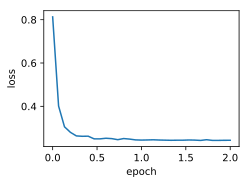

In [6]:
d2l.train_pytorch_ch7(torch.optim.Adagrad, {'lr': 0.1}, features, labels)